In [40]:
import numpy as np
import h5py
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd

In [41]:
f=h5py.File("norm_pars.hdf5")
P=f["Parameters"]
T=f["Time"]

In [8]:
Cov_P=np.matmul(np.transpose(P),P)
Cov_P=np.divide(Cov_P,len(Cov_P[0,:])-1)

In [10]:
L,V=np.linalg.eig(Cov_P)

In [34]:
Inds=[0,1,2,3,4,5,15,16,17]
for i in Inds:
    print('{:.2f}'.format(L[i]))
for i in Inds:
    print(V[:,i])

7283.55
955.20
423.00
180.63
166.67
151.03
117.57
112.46
104.40
[-0.14524731 -0.15208206 -0.19350928 -0.18064725 -0.19551834 -0.19191285
 -0.1873549  -0.19683278 -0.19538933 -0.19719625 -0.18801012 -0.1895711
 -0.18914384 -0.1944808  -0.19733779 -0.19179312 -0.18938421 -0.18618496
 -0.1853347  -0.18694727 -0.21542592 -0.21662795 -0.21498199 -0.21267236
 -0.19447987 -0.14296892  0.10169399 -0.21424812]
[-0.44453877 -0.42103969 -0.07082025 -0.13774983  0.09987053  0.08402323
  0.0172271  -0.00767914  0.09997569  0.04889846  0.05789031  0.13734602
  0.08814426  0.02373194  0.04514616  0.07285147  0.08772711  0.11879817
  0.06040725 -0.23278787  0.04735285  0.08674328  0.08330303 -0.0300681
 -0.17529414 -0.36665273 -0.51977649  0.02937203]
[ 0.00989573 -0.02767356 -0.32515364 -0.36148221 -0.20016598 -0.18811069
 -0.28546652 -0.20570269  0.01035581 -0.0244712  -0.01807628  0.11657091
  0.11265253  0.10459784  0.14775864  0.17107831  0.18004829  0.20007637
  0.20734481 -0.30432134 -0.2145413

In [36]:
g=0
N=10000
for i in range(28):
    g+=L[i]
gL=0
for i in Inds:
    gL+=L[i]
    
print(g,gL,gL/g)


10370.37037037037 9494.502615303627 0.915541323618564


In [28]:
New_P=np.zeros((N,len(Inds)))

In [39]:
for i in range(N):
    k=0
    for j in Inds:
        New_P[i,k]=np.dot(V[:,j],P[i,:])
        k+=1


In [38]:
print(New_P[0])

[ 3.58142903  0.0557977  -0.09312927 -0.04629574 -0.38829811 -2.19316849
 -1.0105488   0.31791961  0.06646854]


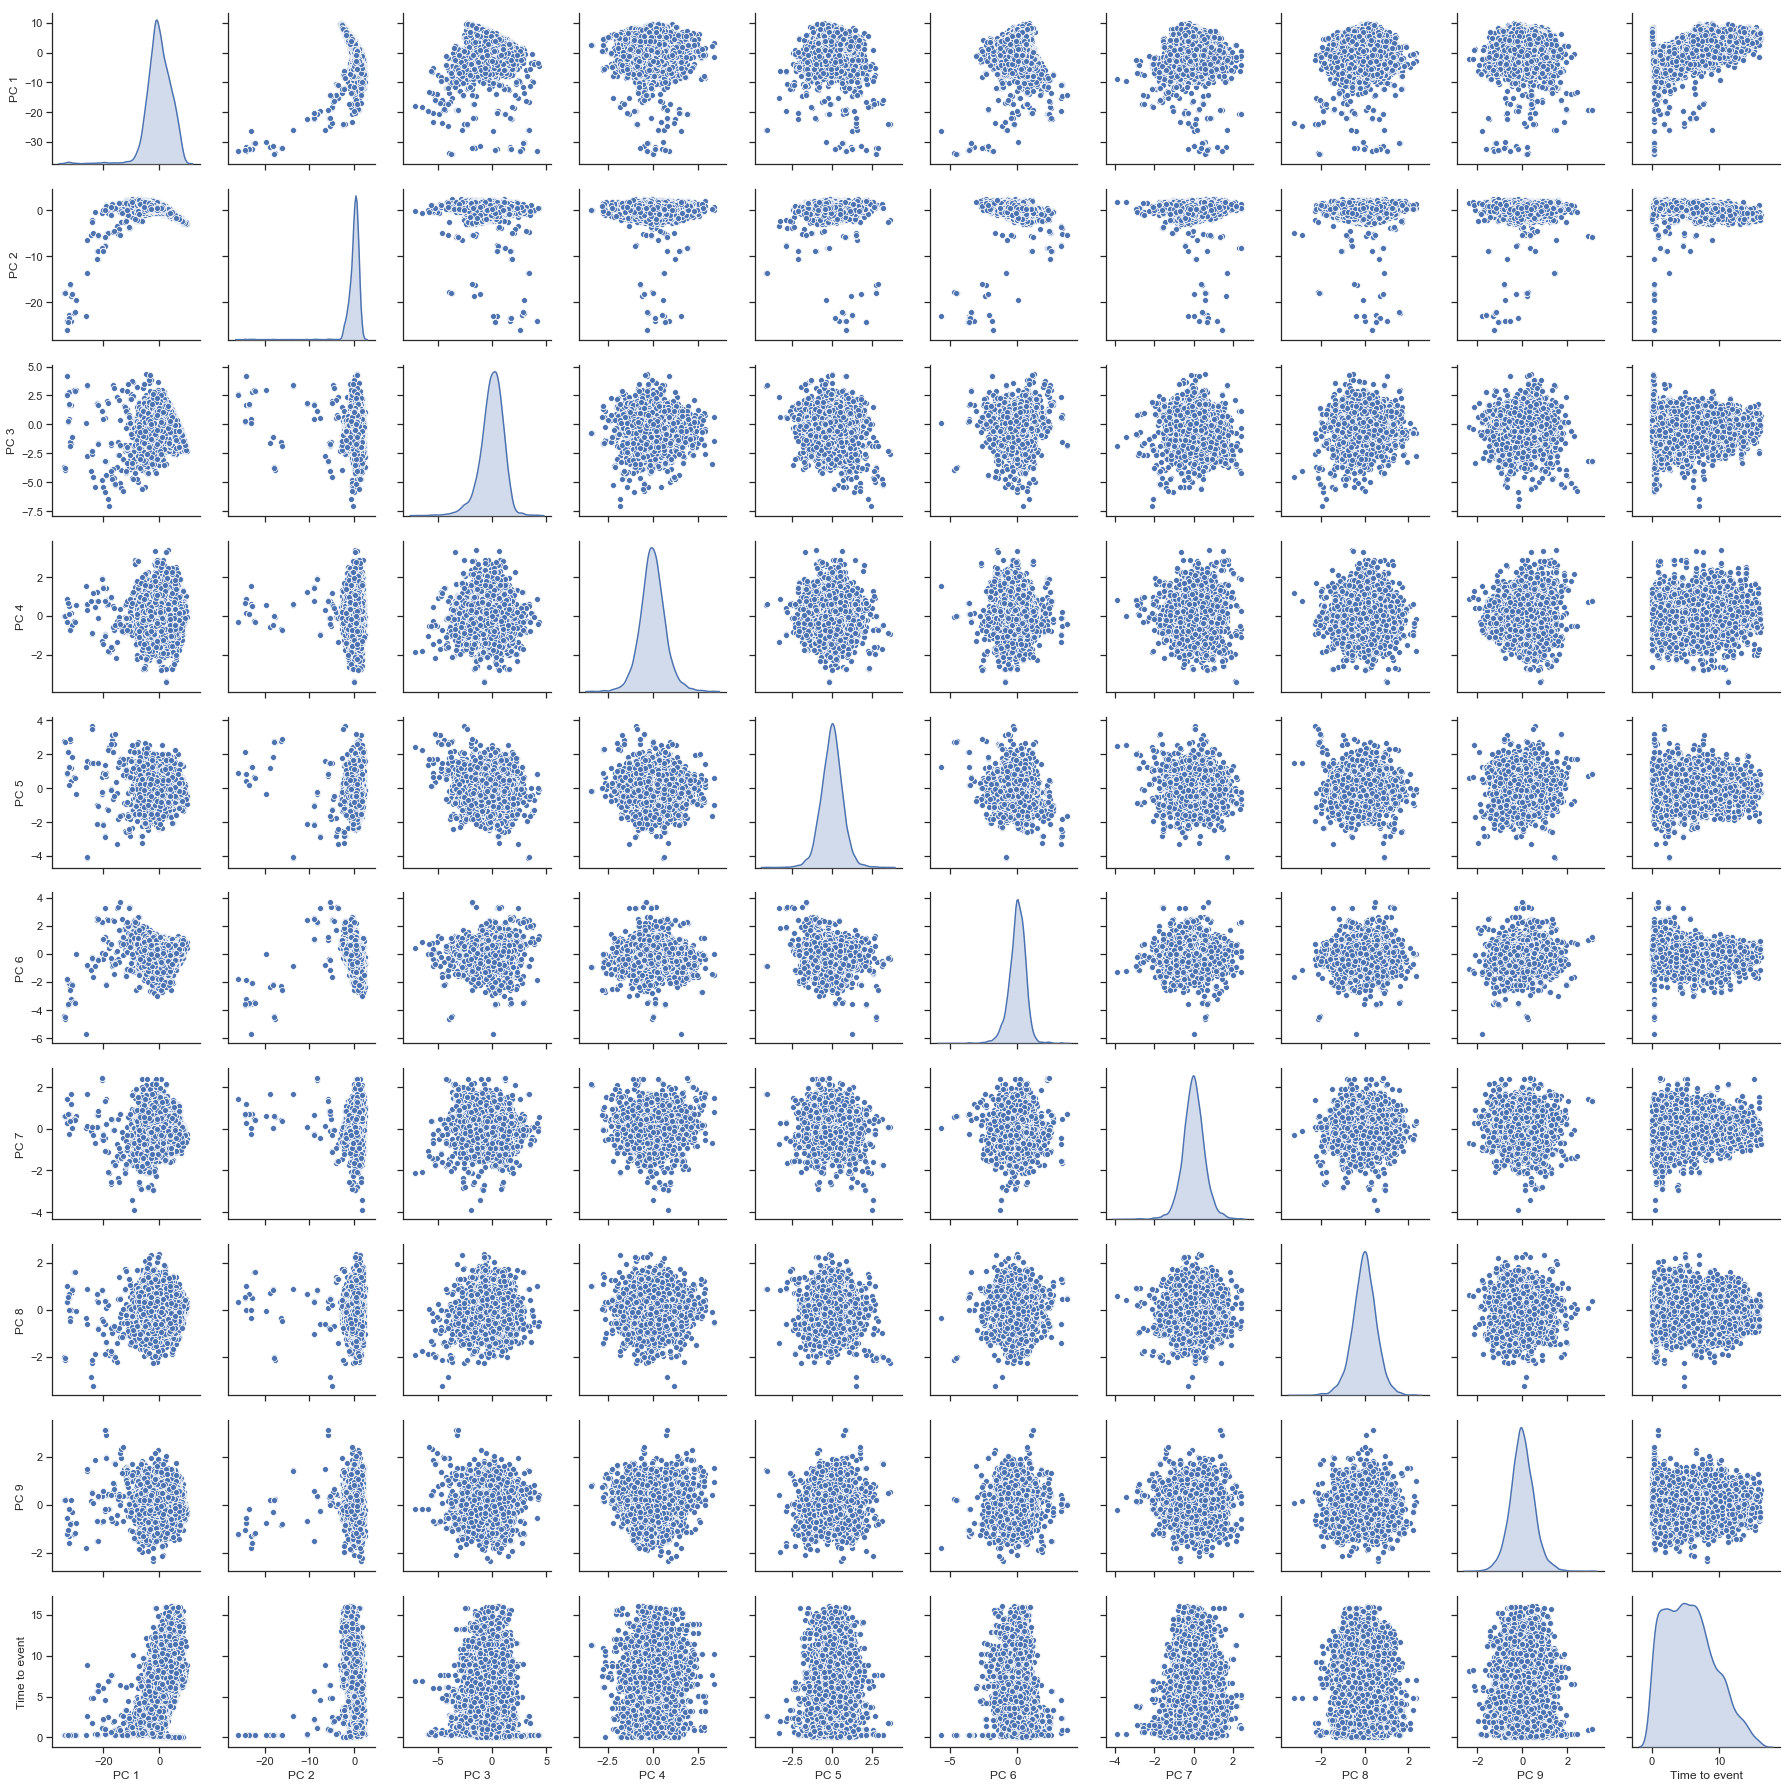

In [42]:
d = {"PC 1":New_P[:,0],"PC 2":New_P[:,1],"PC 3":New_P[:,2],"PC 4":New_P[:,3],"PC 5":New_P[:,4],"PC 6":New_P[:,5], "PC 7":New_P[:,6],"PC 8":New_P[:,7],"PC 9":New_P[:,8],"Time to event":T}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")

In [44]:
fw=h5py.File("PCA_pars.hdf5","w")
P=fw.create_dataset("Parameters",data=New_P)
T=fw.create_dataset("Time",data=T)
fw.close()

OSError: Unable to create file (unable to truncate a file which is already open)